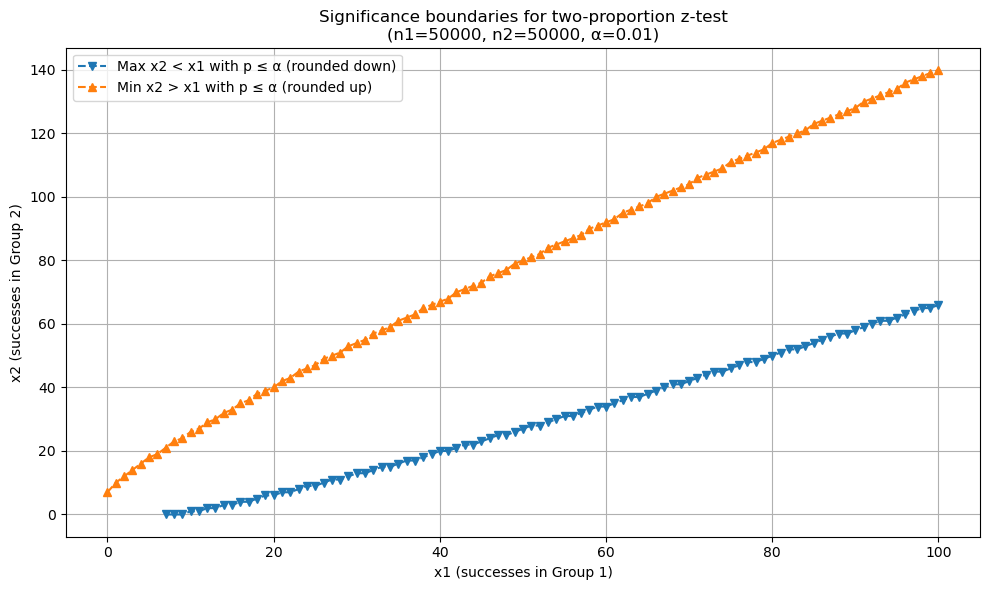

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import ceil, floor

def z_test_p_value(x1, n1, x2, n2):
    p_pooled = (x1 + x2) / (n1 + n2)
    p1 = x1 / n1
    p2 = x2 / n2
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    if se == 0:
        return 1.0
    z = (p1 - p2) / se
    return 2 * (1 - norm.cdf(abs(z)))

def plot_significance_boundaries(n1, n2, alpha=0.01, x1_max=None):
    if x1_max is None:
        x1_max = n1
    x1_vals = np.arange(0, min(n1, x1_max) + 1)
    lower_sig_x2 = []
    upper_sig_x2 = []

    for x1 in x1_vals:
        # Max x2 < x1 with p <= alpha
        max_lower = np.nan
        for x2 in reversed(range(0, x1)):
            p = z_test_p_value(x1, n1, x2, n2)
            if p <= alpha:
                max_lower = floor(x2)
                break
        lower_sig_x2.append(max_lower)

        # Min x2 > x1 with p <= alpha
        min_upper = np.nan
        for x2 in range(x1 + 1, n2 + 1):
            p = z_test_p_value(x1, n1, x2, n2)
            if p <= alpha:
                min_upper = ceil(x2)
                break
        upper_sig_x2.append(min_upper)

    plt.figure(figsize=(10, 6))
    plt.plot(x1_vals, lower_sig_x2, label="Max x2 < x1 with p ≤ α (rounded down)", linestyle='--', marker='v')
    plt.plot(x1_vals, upper_sig_x2, label="Min x2 > x1 with p ≤ α (rounded up)", linestyle='--', marker='^')
    plt.xlabel("x1 (successes in Group 1)")
    plt.ylabel("x2 (successes in Group 2)")
    plt.title(f"Significance boundaries for two-proportion z-test\n(n1={n1}, n2={n2}, α={alpha})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_significance_boundaries(n1=50000, n2=50000, alpha=0.01, x1_max=100)
